# Centrality Measures

## Massive Graph Management & Analytics: 2nd Deliverable

### Jose Antonio Lorencio Abril & Mariana Mayorga Llano

In this notebook we are going to review some centrality measures on graphs. We will use some illustrating graphs that will enable us to understand the different measures and their differences. We will review the following measures:
- Eigenvector centrality
- Clustering coefficient
- Closeness centrality
- Betweenness centrality

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

The following are the graphs that will be presented, compared and analyzed along this notebook

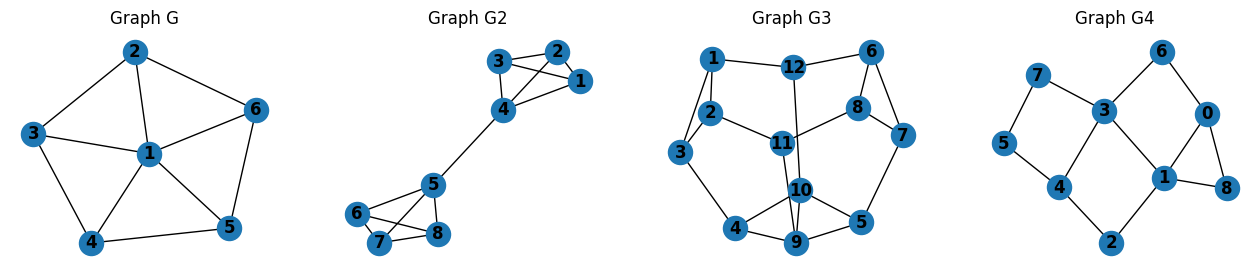

In [2]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6),
                  (2, 3), (3, 4), (4, 5), (5, 6), (6, 2)])

G2 = nx.Graph()
G2.add_edges_from([(1, 2), (2, 3), (3, 4), (1, 3), (1, 4), (2, 4), (3, 4),
                   (4, 5), (5,6),(5,7),(5,8),(6,7),(6,8),(7,8)])

G3 = nx.Graph()
G3.add_edges_from([(1, 2), (2, 3), (3, 4), (1, 3),
                   (4,9),(9,5),(4,10),(10,5), (9,10), (9,11), (10,12), (5,7),(6,7),(6,8),(7,8),
                   (11,2),(11,8),(12,1),(12,6)])

G4 = nx.Graph()
G4.add_edges_from([(1, 2), (1, 3), (4, 2), (4,3), (4,5), (3, 6), (1, 0), (0,6), (3,7), (1,8), (7,5), (0,8)])
G4 = G4.to_undirected()

# Plot the graphs together
plt.figure(figsize=(16, 3))

plt.subplot(1, 4, 1)
nx.draw(G, with_labels=True, font_weight='bold')
plt.title('Graph G')

plt.subplot(1, 4, 2)
nx.draw(G2, with_labels=True, font_weight='bold')
plt.title('Graph G2')

plt.subplot(1, 4, 3)
nx.draw(G3, with_labels=True, font_weight='bold')
plt.title('Graph G3')

plt.subplot(1, 4, 4)
nx.draw(G4, with_labels=True, font_weight='bold')
plt.title('Graph G4')

plt.show()

We are going to define a function to get the rankings obtained by a given measure, and to visualize the top ranked nodes according to the given metric.

In [3]:
def visualize_graph_with_measure(graph, measure_function, measure_name, seed=1000, colormap=plt.cm.Reds):
    # Calculate the measure of each node
    m = measure_function(graph)

    # Sort nodes by m in descending order
    sorted_nodes = sorted(m, key=m.get, reverse=True)

    # Get the nodes with the highest m (all nodes with m == m[sorted_nodes[0]])
    highest_measure_nodes = [n for n in sorted_nodes if abs(m[n] - m[sorted_nodes[0]]) < 1e-10]

    # Create a table of nodes and their measure values
    centrality_data = {'Node': sorted_nodes, measure_name: [m[n] for n in sorted_nodes]}
    centrality_table = pd.DataFrame(centrality_data)


    # Visualize the graph, highlighting the node with the highest measure
    pos = nx.spring_layout(graph, seed=seed)
    node_colors = [m[node] for node in graph.nodes()]

    plt.figure(figsize=(3, 2))
    nx.draw(graph, node_color=node_colors, cmap=colormap, pos=pos, with_labels=True,
            node_size=300, font_size=8, font_color='black')

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
    sm._A = []
    plt.colorbar(sm, ax=plt.gca(), label=measure_name)

    plt.title(f"Graph with Nodes Colored by {measure_name}")
    plt.show()

    # Return the node with its measure value
    highest_measure_value = m[sorted_nodes[0]]
    print(f"{measure_name} ranking: ", sorted_nodes)
    print(f"The nodes with the highest {measure_name} are Nodes {highest_measure_nodes} with a value of {highest_measure_value}.")

    return highest_measure_nodes, highest_measure_value, centrality_table



We will create a function that give us a single table with the 4 centrality meassures ranking to facilitate the comparison.

In [4]:
def graph_centrality_comparison(graph, seed=1000):
    # Call visualize_graph_with_measure for Eigenvector Centrality
    eigenvector_nodes, eigenvector_value, eigenvector_table = visualize_graph_with_measure(graph, nx.eigenvector_centrality, "Eigenvector Centrality", seed)

    # Call visualize_graph_with_measure for Clustering Coefficient
    clustering_nodes, clustering_value, clustering_table = visualize_graph_with_measure(graph, nx.clustering, "Clustering Coefficient", seed)

    # Call visualize_graph_with_measure for Closeness Centrality
    closeness_nodes, closeness_value, closeness_table = visualize_graph_with_measure(graph, nx.closeness_centrality, 'Closeness Centrality', seed)

    # Call visualize_graph_with_measure for Betweenness Centrality
    betweenness_nodes, betweenness_value, betweenness_table = visualize_graph_with_measure(graph, nx.betweenness_centrality, "Betweenness Centrality", seed)

    # Merge individual centrality tables
    compare_centrality_table = pd.merge(eigenvector_table, clustering_table, on='Node', how='outer')
    compare_centrality_table = pd.merge(compare_centrality_table, closeness_table, on='Node', how='outer')
    compare_centrality_table = pd.merge(compare_centrality_table, betweenness_table, on='Node', how='outer')

    return compare_centrality_table

## Graph G Example

We will start with graph G and its Eigenvector centrality.

<ipython-input-5-4b01d28659ff>:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


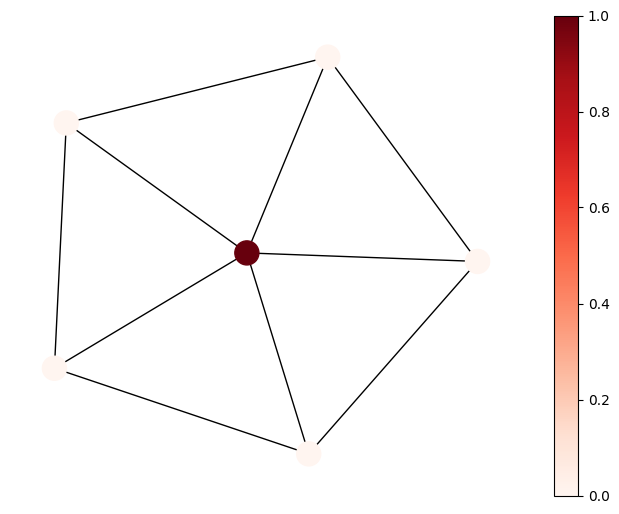

In [5]:
# calculate the eigenvector centrality of nodes
eigenvector_centrality = nx.eigenvector_centrality(G)

# Show the graph, with nodes colored by eigenvector centrality, with fix seed
nx.draw(G, node_color=list(eigenvector_centrality.values()), cmap=plt.cm.Reds, pos=nx.spring_layout(G, seed=43))
# legend
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
plt.colorbar(sm)
plt.show()

In this case, we observe how the central node gets the highest coefficient, which is clearly measuring well the centrality of the nodes in the graph. However, when we use this same graph G to get the clustering coefficient, we can see a different scenario.

<ipython-input-6-15e34186865f>:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


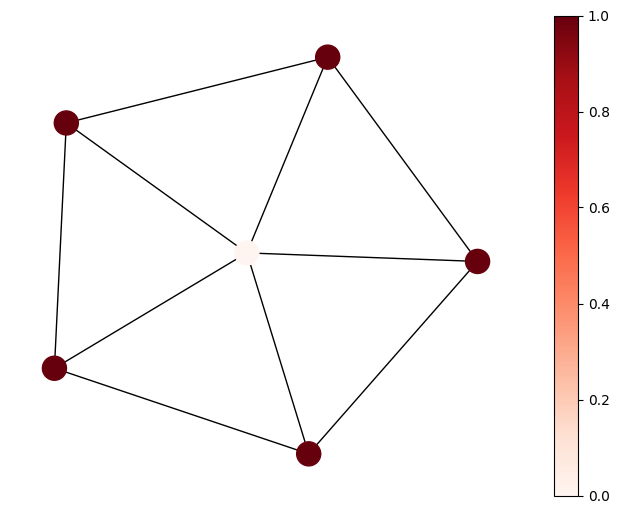

In [6]:
# Now, calculate the clustering coefficient of nodes
clustering_coefficient = nx.clustering(G)

# Show the graph, with nodes colored by clustering coefficient
nx.draw(G, node_color=list(clustering_coefficient.values()), cmap=plt.cm.Reds, pos=nx.spring_layout(G, seed=43))
# legend
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
plt.colorbar(sm)
plt.show()

In this other case, we see how the results are the opposite as before. The reason is that the clustering coefficient is not about the centrality of nodes in the whole graph, but rather to find closely related subgraphs.

<ipython-input-7-1ec5e19858f0>:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)
<ipython-input-7-1ec5e19858f0>:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


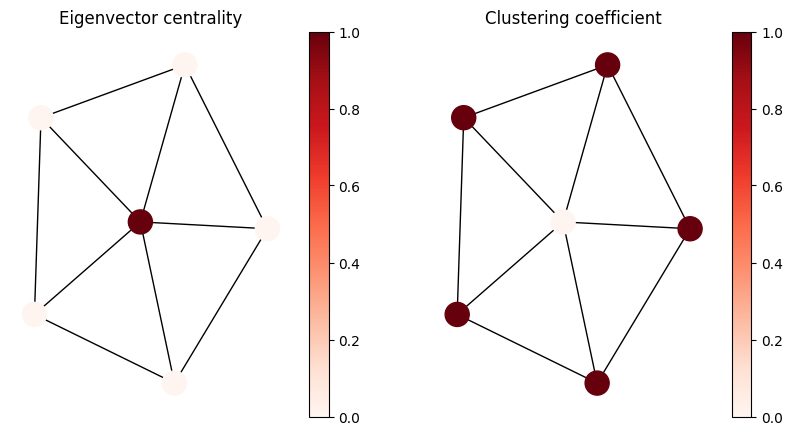

In [7]:
# We now show both measures together
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
nx.draw(G, node_color=list(eigenvector_centrality.values()), cmap=plt.cm.Reds, pos=nx.spring_layout(G, seed=43))
plt.title('Eigenvector centrality')
# legend
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
plt.colorbar(sm)
plt.subplot(1, 2, 2)
nx.draw(G, node_color=list(clustering_coefficient.values()), cmap=plt.cm.Reds, pos=nx.spring_layout(G, seed=43))
plt.title('Clustering coefficient')
# legend
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
plt.colorbar(sm)
plt.show()

Now, if we add the closeness centrality and betweeness into the analysis, we will get the following results.

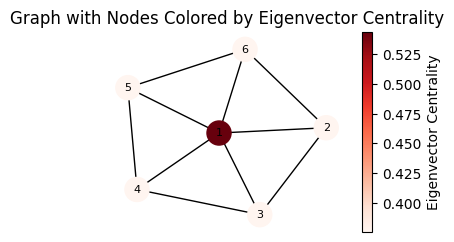

Eigenvector Centrality ranking:  [1, 2, 3, 4, 5, 6]
The nodes with the highest Eigenvector Centrality are Nodes [1] with a value of 0.543944577663942.


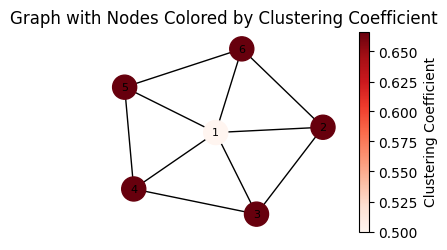

Clustering Coefficient ranking:  [2, 3, 4, 5, 6, 1]
The nodes with the highest Clustering Coefficient are Nodes [2, 3, 4, 5, 6] with a value of 0.6666666666666666.


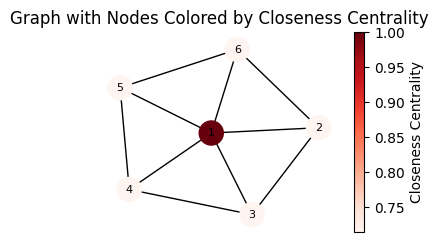

Closeness Centrality ranking:  [1, 2, 3, 4, 5, 6]
The nodes with the highest Closeness Centrality are Nodes [1] with a value of 1.0.


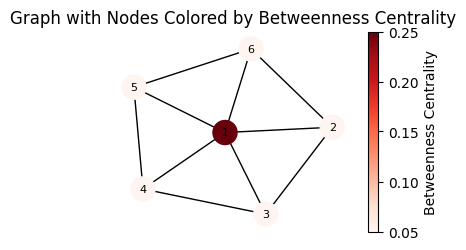

Betweenness Centrality ranking:  [1, 2, 3, 4, 5, 6]
The nodes with the highest Betweenness Centrality are Nodes [1] with a value of 0.25.


,Node,Eigenvector Centrality,Clustering Coefficient,Closeness Centrality,Betweenness Centrality
0,1,0.543945,0.500000,1.000000,0.25
1,2,0.375266,0.666667,0.714286,0.05
2,3,0.375266,0.666667,0.714286,0.05
3,4,0.375266,0.666667,0.714286,0.05
4,5,0.375266,0.666667,0.714286,0.05
5,6,0.375266,0.666667,0.714286,0.05


In [8]:
graph_centrality_comparison(G)

We can see that eigenvector centrality, closeness centrality and betweeness centrality share a same ranking for this example (although with different measures), which is the opposite for clustering coefficient.

Node 1 appears to be a central and influential node, as it has the highest eigenvector centrality, closeness centrality, and betweenness centrality. However, it is the node who has the lowest value in the clustering ranking.

It is also worth mentioning that the graph has, overall, a high level of clustering since many of its nodes are connected with each other.

## Graph G2 Example

Let's test a very different topology with graph G2, where there are two clear clusters connected by some 'bridge' nodes.

<ipython-input-9-f9137495ffbe>:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)
<ipython-input-9-f9137495ffbe>:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


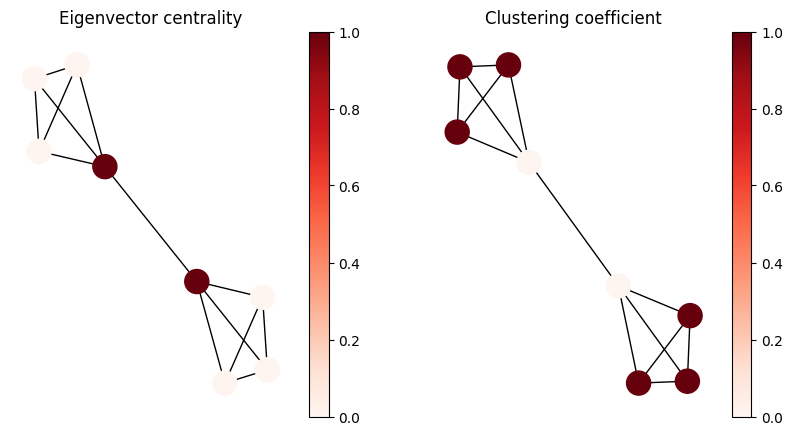

In [9]:
# calculate the eigenvector centrality of nodes
eigenvector_centrality = nx.eigenvector_centrality(G2)

# calculate the clustering coefficient of nodes
clustering_coefficient = nx.clustering(G2)
s = 1002
# We now show both measures together
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
nx.draw(G2, node_color=list(eigenvector_centrality.values()), cmap=plt.cm.Reds, pos=nx.spring_layout(G2, seed=1000))
plt.title('Eigenvector centrality')
# legend
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
plt.colorbar(sm)
plt.subplot(1, 2, 2)
nx.draw(G2, node_color=list(clustering_coefficient.values()), cmap=plt.cm.Reds, pos=nx.spring_layout(G2, seed=1002))
plt.title('Clustering coefficient')
# legend
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
plt.colorbar(sm)
plt.show()

As we observe in the two previous visualizations, these are two metrics that measure very different things and that can, in some cases, give opposite results. Now we also plot betweeness and closeness to see if the ranking behaviour is siminar to the eigenvalues one.

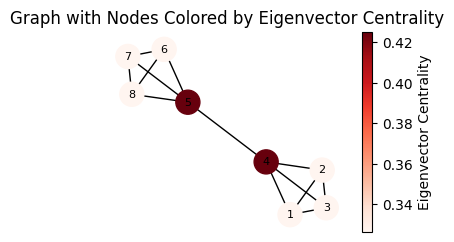

Eigenvector Centrality ranking:  [5, 4, 6, 7, 8, 1, 2, 3]
The nodes with the highest Eigenvector Centrality are Nodes [5, 4] with a value of 0.4250438844696116.


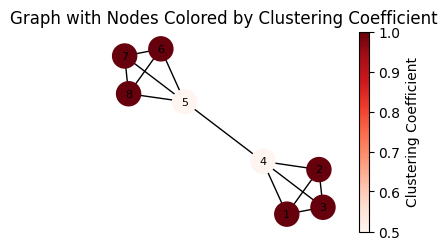

Clustering Coefficient ranking:  [1, 2, 3, 6, 7, 8, 4, 5]
The nodes with the highest Clustering Coefficient are Nodes [1, 2, 3, 6, 7, 8] with a value of 1.0.


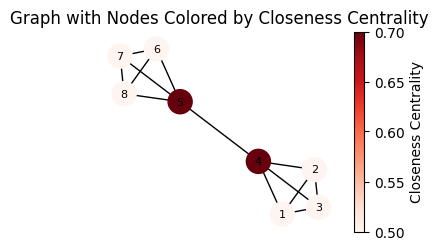

Closeness Centrality ranking:  [4, 5, 1, 2, 3, 6, 7, 8]
The nodes with the highest Closeness Centrality are Nodes [4, 5] with a value of 0.7.


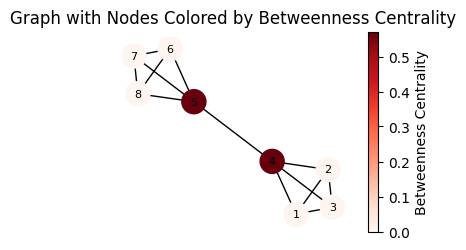

Betweenness Centrality ranking:  [4, 5, 1, 2, 3, 6, 7, 8]
The nodes with the highest Betweenness Centrality are Nodes [4, 5] with a value of 0.5714285714285714.


,Node,Eigenvector Centrality,Clustering Coefficient,Closeness Centrality,Betweenness Centrality
0,5,0.425044,0.5,0.7,0.571429
1,4,0.425044,0.5,0.7,0.571429
2,6,0.326260,1.0,0.5,0.000000
3,7,0.326260,1.0,0.5,0.000000
4,8,0.326260,1.0,0.5,0.000000
5,1,0.326260,1.0,0.5,0.000000
6,2,0.326260,1.0,0.5,0.000000
7,3,0.326260,1.0,0.5,0.000000


In [10]:
graph_centrality_comparison(G2)

Similar to the previous example, Nodes 5 and 4 stands out as central and influential nodes with the highest eigenvector centrality, closeness centrality, and betweenness centrality. Notably, Nodes 1, 2, 3, 6, 7 and 8 have a lower value in the clustering coefficient ranking. This suggests that while Nodes 4 and 5 play a crucial role in connecting the graph, it may not be as closely connected with the neighbors of its neighbors as the other nodes.

It's noteworthy that, as to the first graph, this graph also exhibits a high level of clustering, indicating that many nodes are interconnected with each other

In the next sections we will modify a bit the graph, taking G3 and G4 as example, to try to understand how eigenvector centrality, closeness centrality and betweenness centrality differ.

## Graph G3 Example

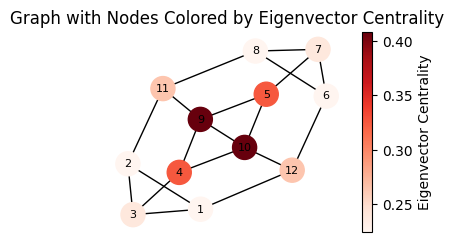

Eigenvector Centrality ranking:  [9, 10, 5, 4, 11, 12, 3, 7, 6, 8, 1, 2]
The nodes with the highest Eigenvector Centrality are Nodes [9, 10] with a value of 0.40813237999887286.


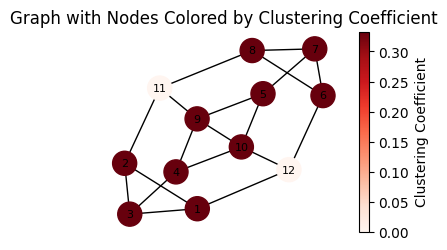

Clustering Coefficient ranking:  [1, 2, 3, 4, 9, 5, 10, 7, 6, 8, 11, 12]
The nodes with the highest Clustering Coefficient are Nodes [1, 2, 3, 4, 9, 5, 10, 7, 6, 8] with a value of 0.3333333333333333.


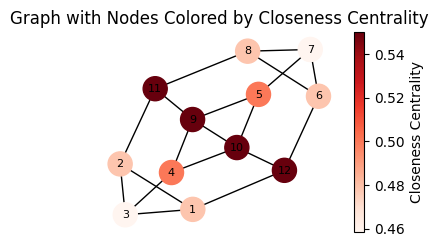

Closeness Centrality ranking:  [9, 10, 11, 12, 4, 5, 1, 2, 6, 8, 3, 7]
The nodes with the highest Closeness Centrality are Nodes [9, 10, 11, 12] with a value of 0.55.


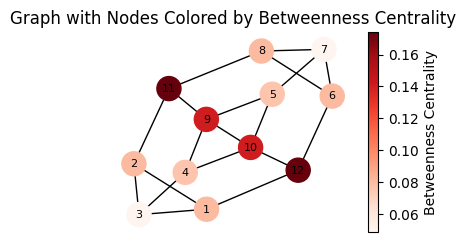

Betweenness Centrality ranking:  [11, 12, 10, 9, 6, 1, 2, 8, 4, 5, 7, 3]
The nodes with the highest Betweenness Centrality are Nodes [11, 12] with a value of 0.1742424242424242.


,Node,Eigenvector Centrality,Clustering Coefficient,Closeness Centrality,Betweenness Centrality
0,9,0.408132,0.333333,0.550000,0.140909
1,10,0.408132,0.333333,0.550000,0.140909
2,5,0.325410,0.333333,0.500000,0.075758
3,4,0.325410,0.333333,0.500000,0.075758
4,11,0.264286,0.000000,0.550000,0.174242
5,12,0.264286,0.000000,0.550000,0.174242
6,3,0.238771,0.333333,0.458333,0.048485
7,7,0.238771,0.333333,0.458333,0.048485
8,6,0.224363,0.333333,0.478261,0.080303
9,8,0.224363,0.333333,0.478261,0.080303


In [11]:
graph_centrality_comparison(G3, seed=1)

As we can observe, now the results are different for all measures.
One could argue that nodes 9 and 10 looks more central in the topology of the graph, and eigenvalue centrality gives this result. However, according to betweenness, the most central nodes are 11 and 12, which also makes sense, since they represents a shortcut to take for many of the nodes of the graph. On the other hand, in terms of closeness the nodes from 9 to 12 share the highest value of the graph since they are located "in the middle" and are equaly connected among the rest of the nodes.

It is also interesting noting how the lowest clustering coefficients have still the highest betweeness centrality, but not exclusively the highest closeness nor eigenvalue centrality. This makes sence considering that the highest nodes from betweeness rankings are the ones who facilitate the conection among different parts of the network, and since the objective of the clustering coefficient is to find nodes that would facilitate the division of the graph, it makes sense that this two measurements have a higher inverse correlation.

## Graph G4 Example

Finally, we analize graph G4, which also has different results for every meassure.

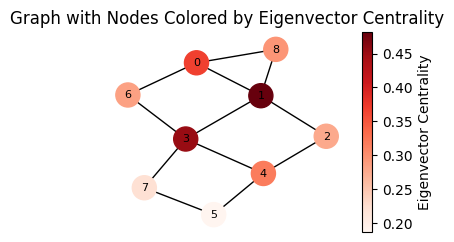

Eigenvector Centrality ranking:  [1, 3, 0, 4, 8, 6, 2, 7, 5]
The nodes with the highest Eigenvector Centrality are Nodes [1] with a value of 0.4819098473256993.


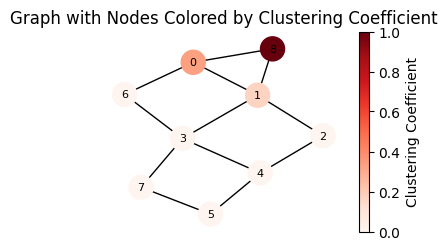

Clustering Coefficient ranking:  [8, 0, 1, 2, 3, 4, 5, 6, 7]
The nodes with the highest Clustering Coefficient are Nodes [8] with a value of 1.0.


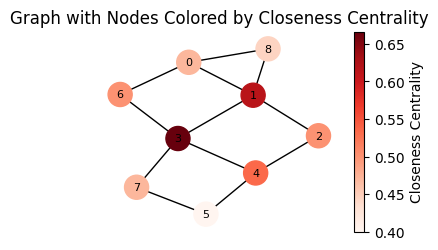

Closeness Centrality ranking:  [3, 1, 4, 2, 6, 0, 7, 8, 5]
The nodes with the highest Closeness Centrality are Nodes [3] with a value of 0.6666666666666666.


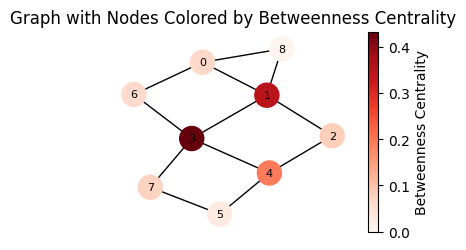

Betweenness Centrality ranking:  [3, 1, 4, 2, 7, 0, 6, 5, 8]
The nodes with the highest Betweenness Centrality are Nodes [3] with a value of 0.43333333333333324.


,Node,Eigenvector Centrality,Clustering Coefficient,Closeness Centrality,Betweenness Centrality
0,1,0.481910,0.166667,0.615385,0.348810
1,3,0.452046,0.000000,0.666667,0.433333
2,0,0.367378,0.333333,0.470588,0.065476
3,4,0.317301,0.000000,0.533333,0.194048
4,8,0.294302,1.000000,0.444444,0.000000
5,6,0.283954,0.000000,0.500000,0.061905
6,2,0.276950,0.000000,0.500000,0.078571
7,7,0.221329,0.000000,0.470588,0.073810
8,5,0.186652,0.000000,0.400000,0.029762


In [12]:
graph_centrality_comparison(G4)

In terms of centrality, eigenvector, closeness and betweeness, they all agree that Nodes 1 and 3 are the the top 2 in their ranking. However, eigenvalue gives a higher score to node 1, opposite to closeness and betweeness which give a higher score to Node 3.

We can also see that the rest of the nodes also have a different position in the 3 centrality rankings. For example, Node 5 is the lowest score in eigenvector and closeness, while for betweeness the lowest score is Node 8 because its neighbors are connected so if we re-disconnect Node 8 from the graph, the impact on the graph would be minimal.

This fact also makes sense with Node 8 having the highest Clustering coefficient, since disconnecting 8 would allow isolating Node 8 from the rest of the graph partitionating it perfectly into 2 subgraphs (One with Node 8 alone, and another one with the rest of the Nodes).

It is also interesting to note, that although the inverse ranking of the clustering coefficient is mostly similar to the betweeness ranking, these are not exactly the same, as shown by Node 5, which has the second lowest betweeness value but it is also in the lowest side from the clustering coefficient. This is because they are not measuring opposite things, but rather 'independent' things.